In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load excel sheet which starts with channel_XX ( dynamic channel number)
excel_file = pd.ExcelFile('dv_2022_10_28_10_Zyklen_0_3V_dann_0_15V_Channel_24.xlsx')

# Get the sheet names in the Excel file
sheet_names = excel_file.sheet_names
print(sheet_names)


['Tabelle1', 'Global_Info', 'Channel_24_1']


In [3]:
# Initialize an empty DataFrame to store the data
channel_data = pd.DataFrame()

# Iterate through the sheet names
for sheet_name in sheet_names:
    #Check if the sheet name starts with 'channel'
    if sheet_name.startswith('Channel'):
        # Load the sheet into a DataFrame
        channel_data = excel_file.parse(sheet_name)
#clean emty rows where all the values are NaN
channel_data.dropna(how='all', inplace=True)
channel_data.head()

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s)
0,2022-10-28 11:12:38.563,0.3074,0.3073,1,1,-0.001743,-0.000001,0.0,0.000000,0.0,0.000000,NaN,2.817129,NaN
1,2022-10-28 11:12:48.568,10.3121,10.0001,2,1,-0.149032,-0.004980,0.0,0.000014,0.0,0.000002,NaN,2.817129,-0.003577
2,2022-10-28 11:12:58.568,20.3122,20.0002,2,1,-0.171881,-0.004980,0.0,0.000028,0.0,0.000004,NaN,2.817129,-0.001636
3,2022-10-28 11:13:08.568,30.3127,30.0007,2,1,-0.183500,-0.004980,0.0,0.000041,0.0,0.000006,NaN,2.817129,-0.001191
4,2022-10-28 11:13:18.568,40.3125,40.0005,2,1,-0.191315,-0.004980,0.0,0.000055,0.0,0.000009,NaN,2.817129,-0.001083


In [4]:
# create new dataframe with only the relevant columns
data = pd.DataFrame()
data = channel_data[['Step_Time(s)', 'Voltage(V)', 'Current(A)','Cycle_Index']]
data.head()

,Step_Time(s),Voltage(V),Current(A),Cycle_Index
0,0.3073,-0.001743,-0.000001,1
1,10.0001,-0.149032,-0.004980,1
2,20.0002,-0.171881,-0.004980,1
3,30.0007,-0.183500,-0.004980,1
4,40.0005,-0.191315,-0.004980,1


In [5]:
# Filtering the data for the first charging cycle
def filter_cycle(cycle_number, charging = True):
    cycle_data = data[data['Cycle_Index'] == cycle_number]
    if charging:
        return cycle_data[cycle_data['Current(A)'] > 0]
    return cycle_data[cycle_data['Current(A)'] < 0]

/var/folders/wf/09z_jsmj3fj_d54lysrpg4dc0000gn/T/ipykernel_90053/2851261496.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


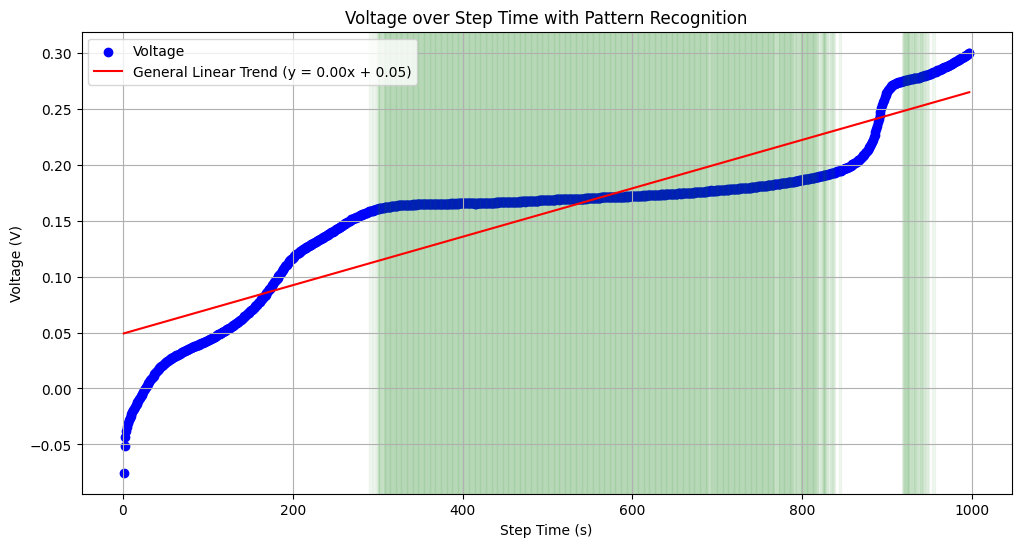

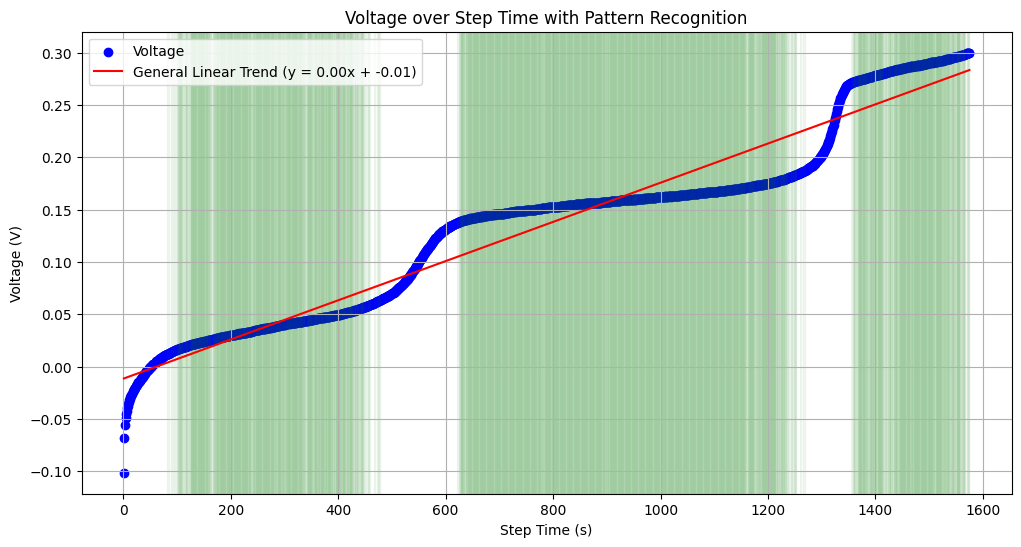

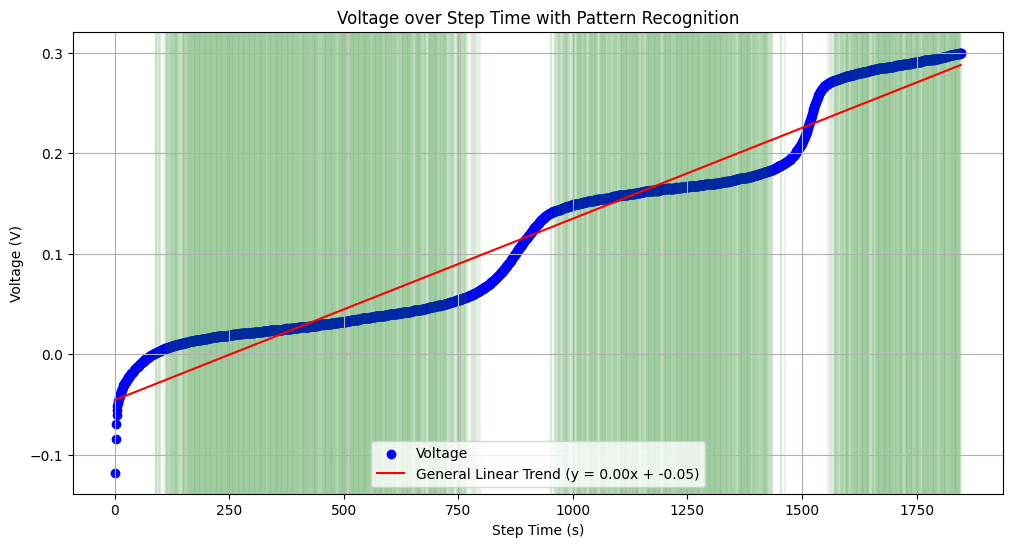

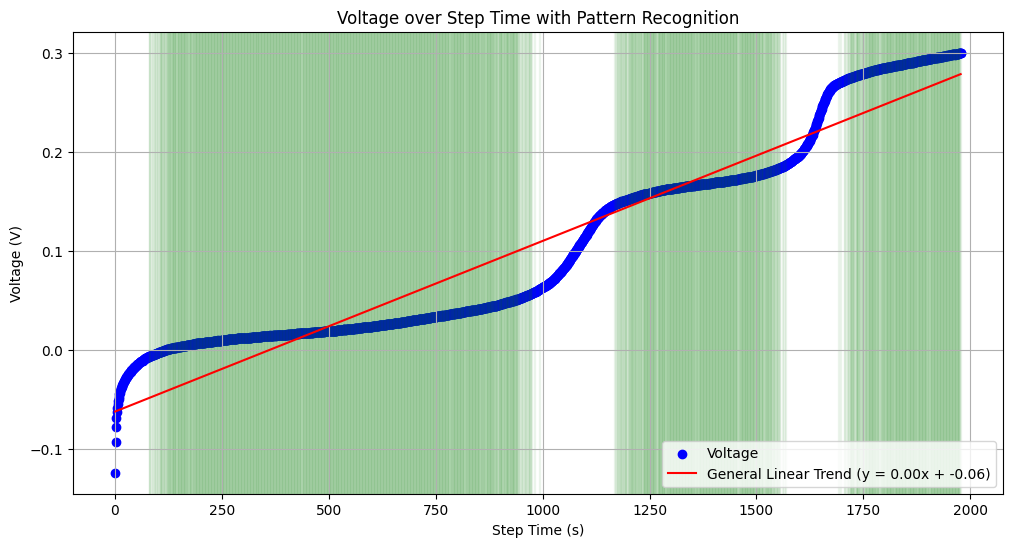

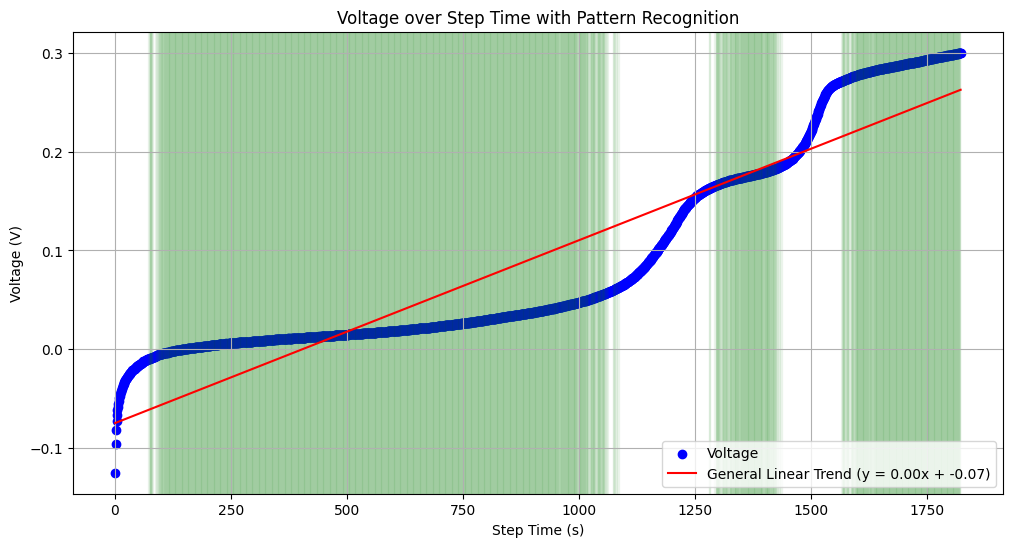

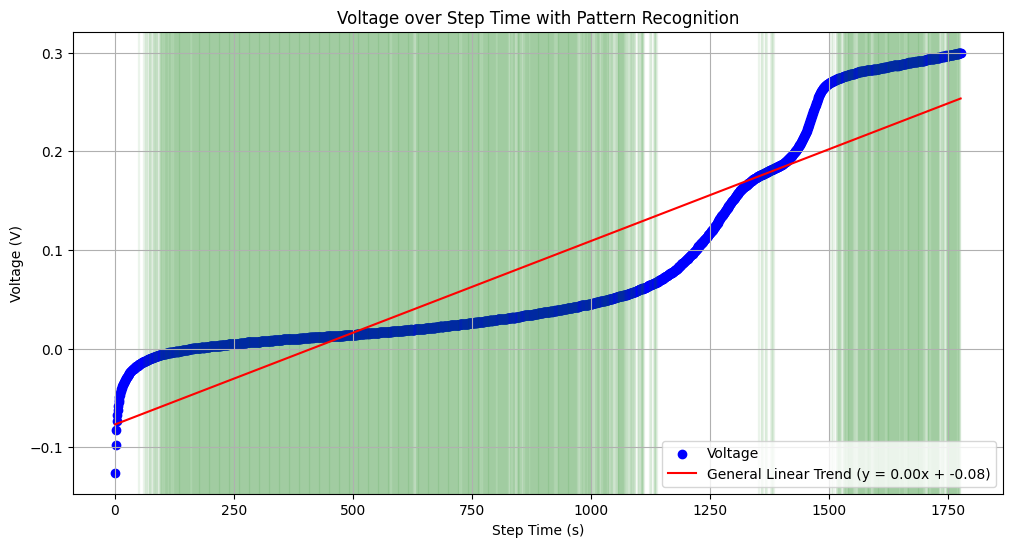

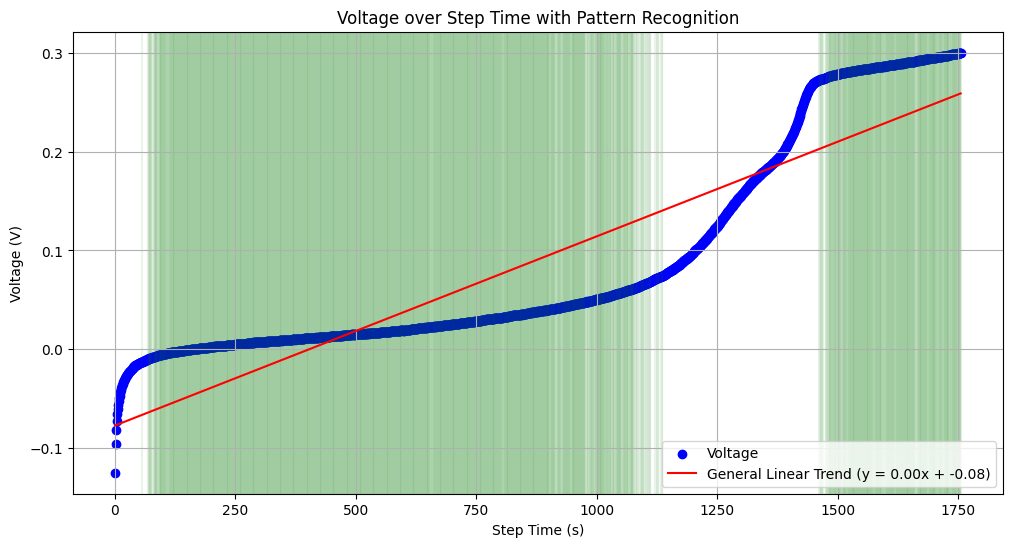

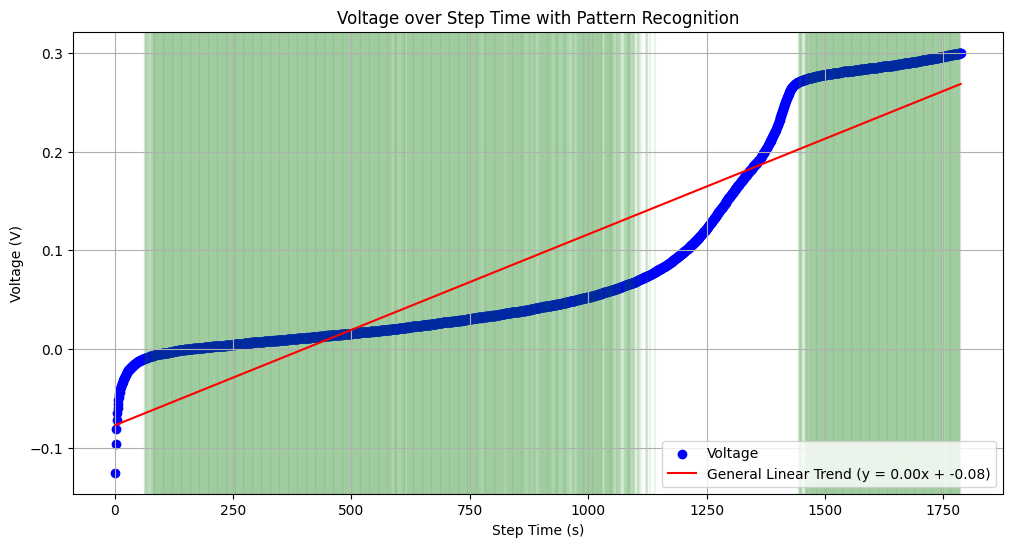

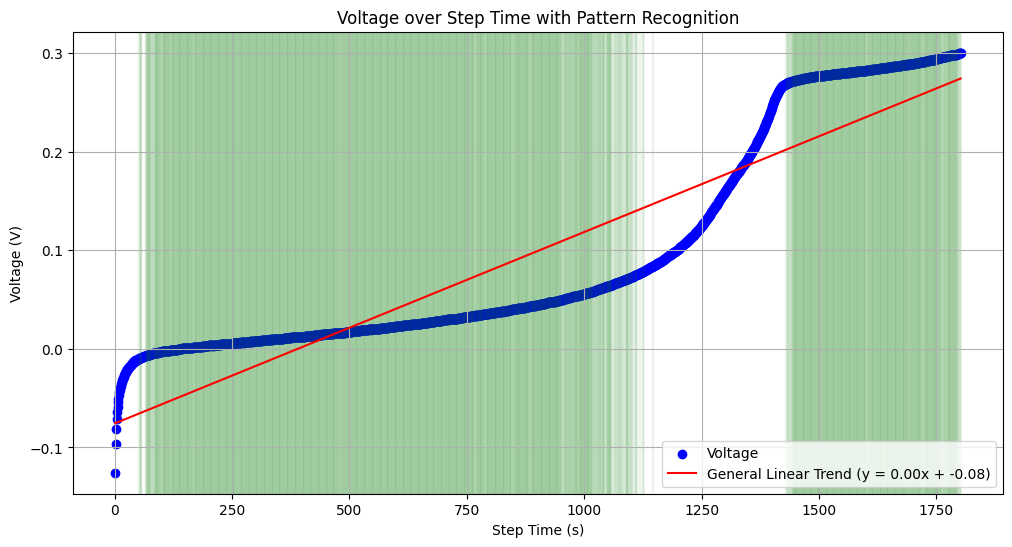

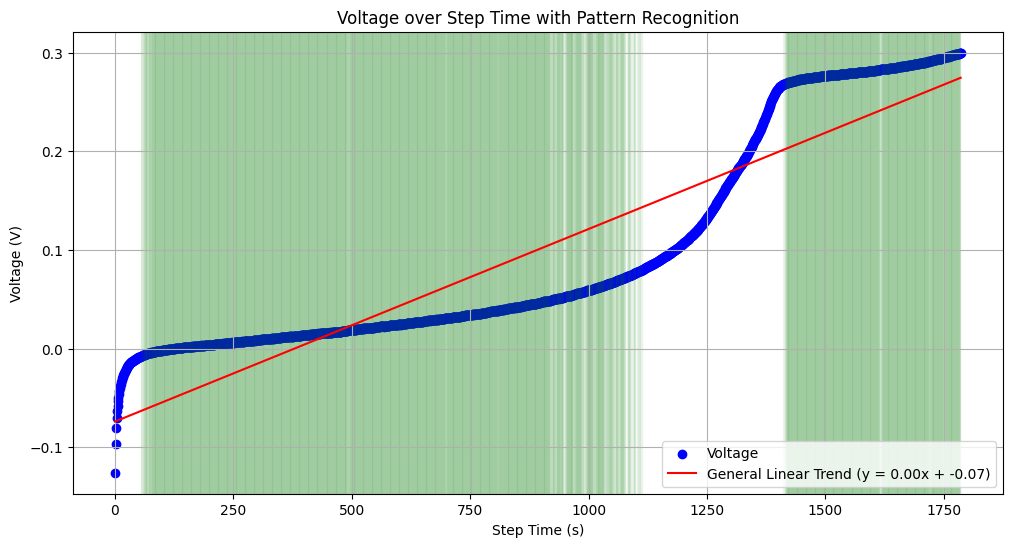

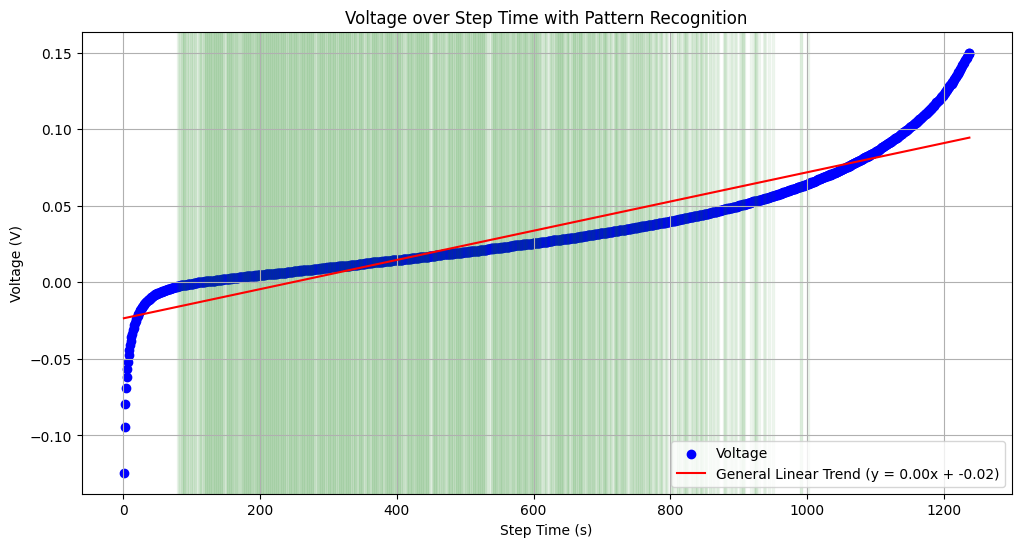

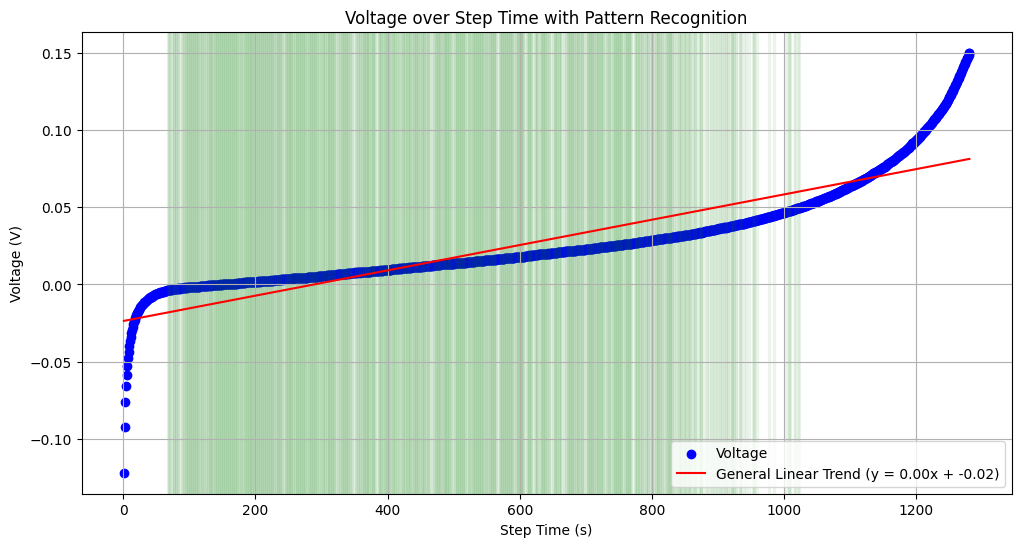

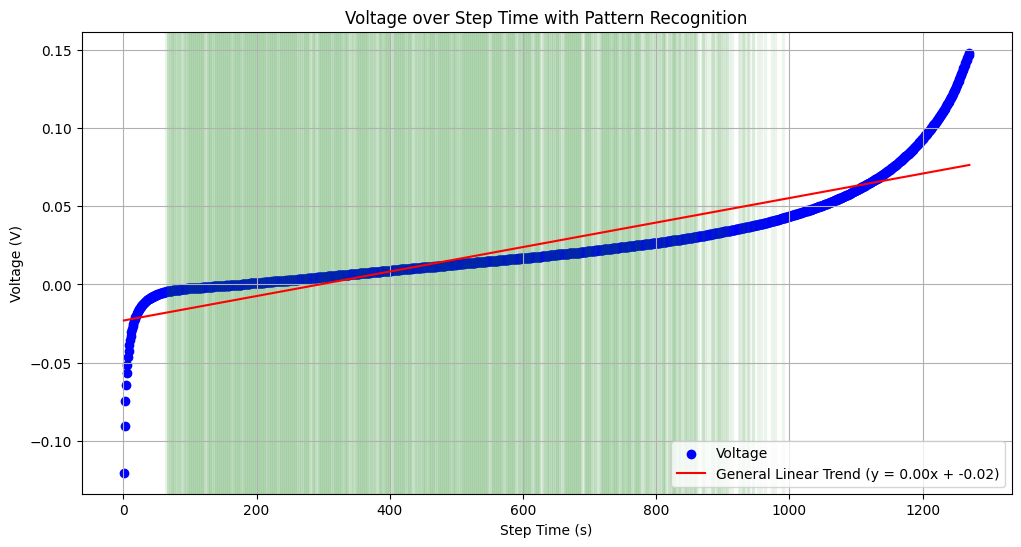

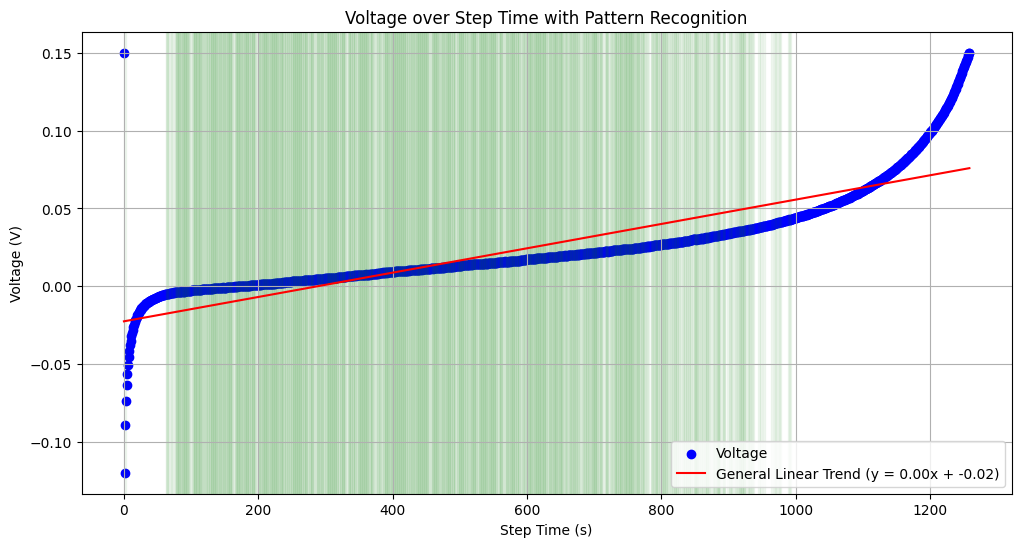

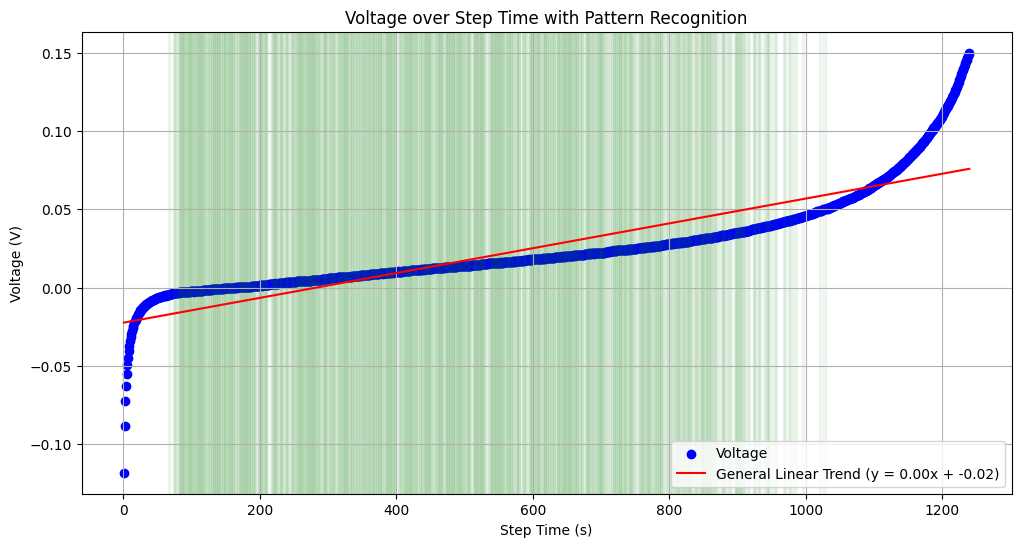

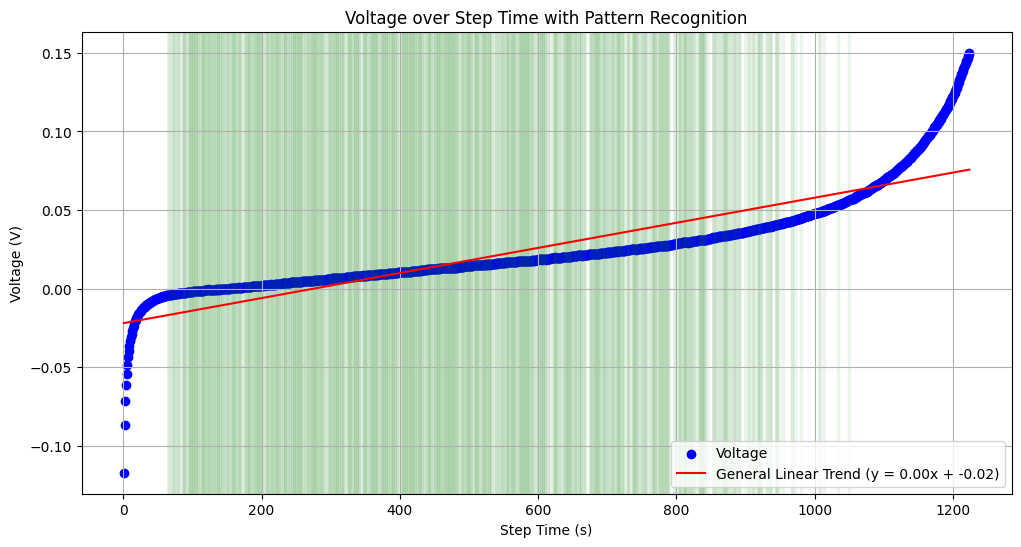

In [41]:
#if you wanna have an output as pdf file
#from matplotlib.backends.backend_pdf import PdfPages
#pdf_pages = PdfPages('res_decharging_cycle_1-49.pdf')
for i in range(1, 50):
    cycle_data = filter_cycle(i)
    # Scatter Plot ile Veriyi Görselleştirme
    plt.figure(figsize=(12, 6))
    plt.scatter(cycle_data['Step_Time(s)'], cycle_data['Voltage(V)'], color='blue', label='Voltage', marker='o')
    plt.title('Voltage over Step Time with Pattern Recognition')
    plt.xlabel('Step Time (s)')
    plt.ylabel('Voltage (V)')

    # Genel Çizgiyi Eklemek
    from numpy import polyfit

    x = cycle_data['Step_Time(s)']
    y = cycle_data['Voltage(V)']
    slope, intercept = polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color='red', label=f'General Linear Trend (y = {slope:.2f}x + {intercept:.2f})')

    # Ardışık 10 Veriyi Almak ve Yeni Bir Doğrusal Eğim Hesaplamak
    window_size = 4
    for i in range(len(x) - window_size + 1):
        x_window = x[i:i+window_size]
        y_window = y[i:i+window_size]
        slope_window, _ = polyfit(x_window, y_window, 1)
        
        # Eğim penceresi, genel eğimden büyükse, yeşil bir şeffaf dikdörtgen çizin
        if slope_window < slope:
            plt.axvspan(x_window.min(), x_window.max(), color='green', alpha=0.05)

    plt.legend()
    plt.grid(True)
    #plt.show()
    #if you wanna have an output as pdf file
    #pdf_pages.savefig()
    #plt.close()  # Close the current plot to release memory
#if you wanna have an output as pdf file
#pdf_pages.close() 

